In [1]:
import begin1 as bg
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.utils import resample,shuffle
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import pickle

import lightgbm as lgb
from xgboost import XGBClassifier

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## Loading the data

The data was loaded using the begin library. Data used is a Titanic trainset

In [3]:
train = bg.DataLoading(r"C:\Users\Blaq_Jesus\Desktop\Python Projects\Endtoendproject1", "train.csv").csv()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory data analysis

Various functions are used to get the sense of the data; the structure, the columns, etc

In [4]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Vande Velde, Mr. Johannes Joseph",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train["Sex"].value_counts("female")

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [7]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

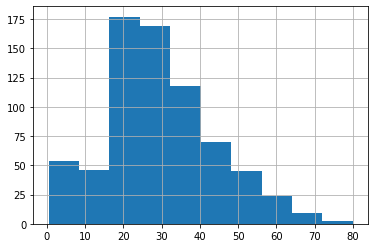

In [9]:
train["Age"].hist(bins=10)

In [10]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


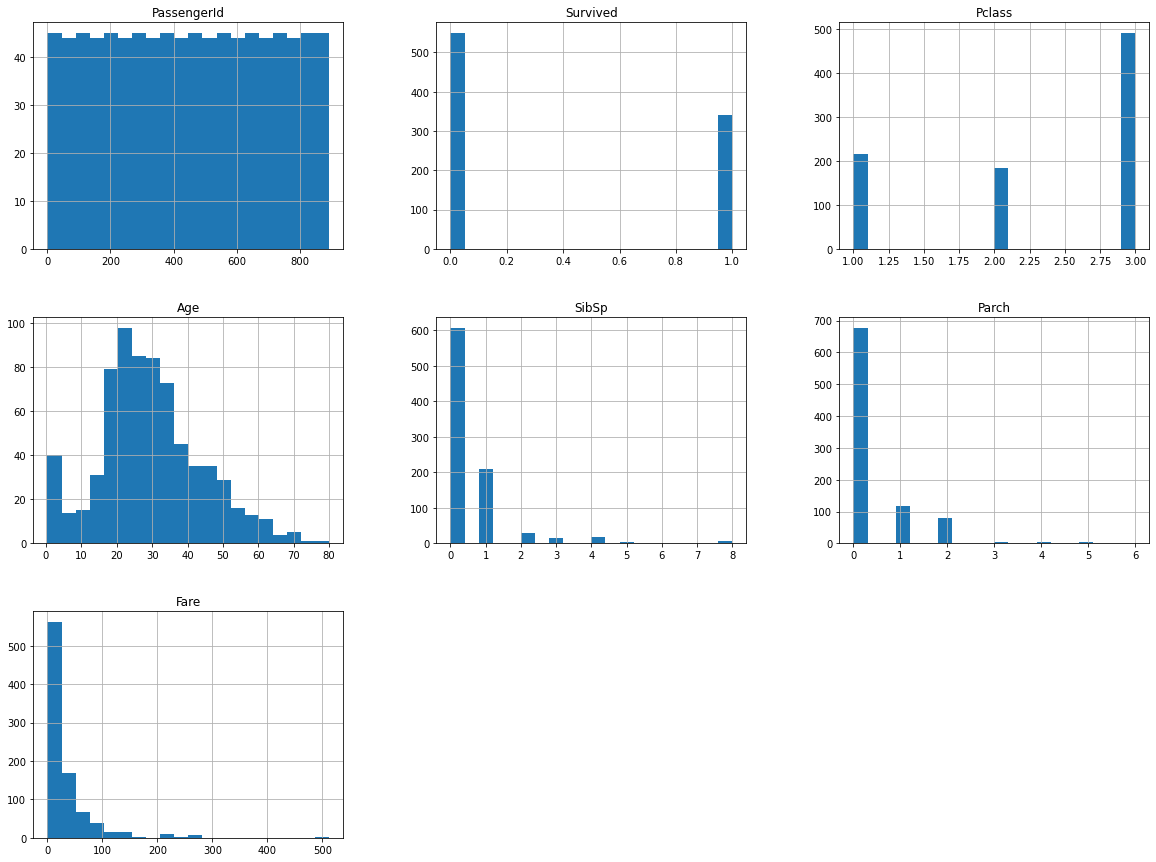

In [11]:
train.hist(bins=20, figsize=(20,15))
plt.show()

### Dealing with null values

### 1. Age attribute

In [12]:
# finding the ratio of 'male' to 'female' in the dataset
print(train["Sex"].value_counts("male"))

male      0.647587
female    0.352413
Name: Sex, dtype: float64


In [13]:
# subsetting all the ratio of the missing values
train[train["Age"].isnull()]["Sex"].value_counts("male")

male      0.700565
female    0.299435
Name: Sex, dtype: float64

In [14]:
# grouping the ages into bins

binwidth = int((max(train["Age"])-min(train["Age"]))/11)
bins = range(int(min(train["Age"])), int(max(train["Age"])), binwidth)
group_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
train["Age_binned"] = pd.cut(train["Age"], bins, labels=group_names)

<AxesSubplot:>

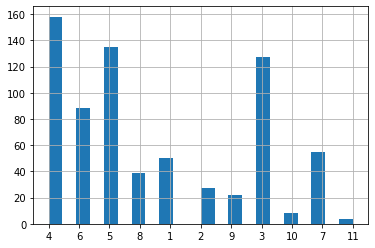

In [15]:
train["Age_binned"].hist(bins=22) # for visualization the lower the bin number, more compact the plot

In [16]:
# saving and finding the ratio of 'male' to 'female' in the bins that have counts > 50
fourth = train[train["Age_binned"]=="4"]
print(fourth["Sex"].value_counts("male"))
sixth = train[train["Age_binned"]=="6"]
print(sixth["Sex"].value_counts("male"))
fifth = train[train["Age_binned"]=="5"]
print(fifth["Sex"].value_counts("male"))
third = train[train["Age_binned"]=="3"]
print(third["Sex"].value_counts("male"))
seventh = train[train["Age_binned"]=="7"]
print(seventh["Sex"].value_counts("male"))

male      0.64557
female    0.35443
Name: Sex, dtype: float64
male      0.636364
female    0.363636
Name: Sex, dtype: float64
male      0.644444
female    0.355556
Name: Sex, dtype: float64
male      0.637795
female    0.362205
Name: Sex, dtype: float64
male      0.654545
female    0.345455
Name: Sex, dtype: float64


fourth


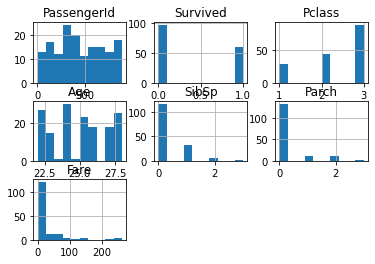

sixth


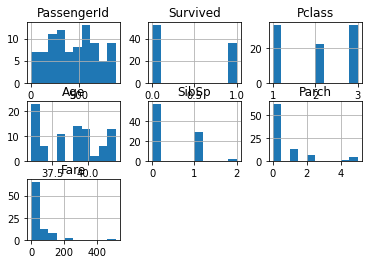

fifth


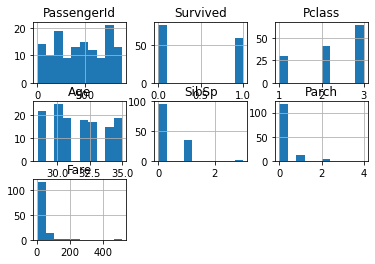

third


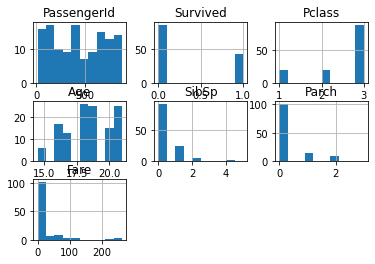

seventh


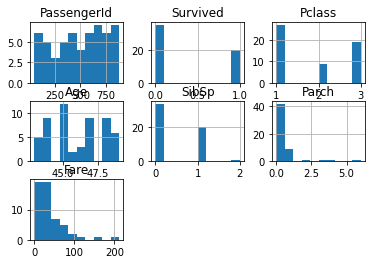

In [17]:
# visualizing bins
print("fourth")
fourth.hist()
plt.show()
print("sixth")
sixth.hist()
plt.show()
print("fifth")
fifth.hist()
plt.show()
print("third")
third.hist()
plt.show()
print("seventh")
seventh.hist()
plt.show()


In [18]:
# creating a dataset of revelant ages to use
age_df = [fourth, fifth, third]
age_df = pd.concat(age_df)
age_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,4
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,4
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S,3
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,3
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,3
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,3


In [19]:
# calculating the mean of the relevant age groups 
# replacing missing values with the mean
mean = round(age_df["Age"].mean(), 5)
# print(mean)
train["Age"] = train["Age"].fillna(mean)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_binned   713 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.9+ KB


In [21]:
# rebinning to categorize ages
binwidth = int((max(train["Age"])-min(train["Age"]))/11)
bins = range(int(min(train["Age"])), int(max(train["Age"])), binwidth)
group_names = ['1', '2', '3', "4", '5', '6', '7', '8', '9', '10', '11']
train["Age_binned"] = pd.cut(train["Age"], bins, labels=group_names)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_binned   890 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.9+ KB


In [23]:
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex       Age  \
0                              Braund, Mr. Owen Harris    male  22.00000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00000   
2                               Heikkinen, Miss. Laina  female  26.00000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00000   
4                             Allen, Mr. William Henry    male  35.00000   
..                                                 ...     ...       ...   
886        

### Performing data preprocessing on the name attribute

In [24]:
# saving the name attribute as a series dataset
names = pd.Series(train["Name"])
names.shape

(891,)

In [25]:
for i in range(0, 891):
    train[['Last','First']]=train.Name.str.split(",", expand=True)
    
# Split code here if an error is generated after running    

for i in range(0, 891):
    train[['Title','Firstname', "Other"]]=train.First.str.split(".", expand=True)

In [26]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_binned,Last,First,Title,Firstname,Other
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,4,Braund,Mr. Owen Harris,Mr,Owen Harris,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,6,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs,John Bradley (Florence Briggs Thayer),None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,Miss. Laina,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,5,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs,Jacques Heath (Lily May Peel),None
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,5,Allen,Mr. William Henry,Mr,William Henry,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S,4,Montvila,Rev. Juozas,Rev,Juozas,None
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S,3,Graham,Miss. Margaret Edith,Miss,Margaret Edith,None
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.17024,1,2,W./C. 6607,23.4500,NaN,S,4,Johnston,"Miss. Catherine Helen ""Carrie""",Miss,"Catherine Helen ""Carrie""",None
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C,4,Behr,Mr. Karl Howell,Mr,Karl Howell,None


In [27]:
train.Title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Jonkheer          1
 Sir               1
 Mme               1
 Don               1
 the Countess      1
 Ms                1
 Lady              1
 Capt              1
Name: Title, dtype: int64

In [28]:
# 
testagg=train.groupby("Title")["Survived"].aggregate(["mean"]).reset_index(level=0)
testage=train.groupby("Title")["Age"].aggregate(["min","max","mean"]).reset_index(level=0)
aggr = pd.merge(testagg,testage, on="Title",suffixes=["_survived","_age"])
# print(aggr)

### Embarked feature

In [29]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
train[train.Embarked.isnull().values]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_binned,Last,First,Title,Firstname,Other
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,Icard,Miss. Amelie,Miss,Amelie,None
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,9,Stone,Mrs. George Nelson (Martha Evelyn),Mrs,George Nelson (Martha Evelyn),None


In [31]:
sexagg=train.groupby("Embarked")["Sex"].aggregate(["count"]).reset_index(level=0)
sexagg

,Embarked,count
0,C,168
1,Q,77
2,S,644


In [32]:
mode = pd.crosstab(train.Embarked, [train.Sex, train.Age_binned])
# mode

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_binned   890 non-null    category
 13  Last         891 non-null    object  
 14  First        891 non-null    object  
 15  Title        891 non-null    object  
 16  Firstname    891 non-null    object  
 17  Other        1 non-null      object  
dtypes: category(1), float64(2), in

In [34]:
train["Embarked"]=train["Embarked"].fillna("S")

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Age_binned   890 non-null    category
 13  Last         891 non-null    object  
 14  First        891 non-null    object  
 15  Title        891 non-null    object  
 16  Firstname    891 non-null    object  
 17  Other        1 non-null      object  
dtypes: category(1), float64(2), in

In [36]:
train.drop(["Last","Name", "Cabin", "First", "Firstname", "Ticket", "Other"], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    object  
 9   Age_binned   890 non-null    category
 10  Title        891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 71.0+ KB


In [37]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_binned,Title
0,1,0,3,male,22.0,1,0,7.2500,S,4,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,6,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,4,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,5,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,5,Mr


### Handling Imbalanced Data

Machine Learning mdodels trains and predict based on the assumption that the data is balanced. A balanced data is a dataset where the target attribute has an equal counts. That is, for a binary class attribute there should be an equal number of yes and no, true and false, 0 and 1, dead and alive, etc. There are four ways of handling an imbalanced dataset of which two are commonly used. 

#### 1. Up/Over Sampling
In this case the minority set is increased to equal the majority set. This is done by simulating values for the minority set whiles maintaining the structure of the set. 
This method is used when
1. the minority set has a very low length. Example is the whole dataset has 1000 yes'es and 100 no's.
2. the processing power of the system/pc is high.


#### 2. Down/Under Sampling
When a binary class dataset has more of one class than the other, down sampling decreases the majority class to equal the minority class. This is done by randomly deleting row entries but still maintaining the structure of the class. 
This method is used when 
1. the minority set has enough value counts which will not affect the structure of the dataset. Example minority set has 500 entries and majority set has 800.
2. the processing power of the system/pc is low since less memory is used.


#### 3. Class Weights

#### 4. SMOTE Technique

## Performing upsampling

In [38]:
trainee = train.copy()

In [39]:
trainee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    object  
 9   Age_binned   890 non-null    category
 10  Title        891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 71.0+ KB


In [40]:
#Create independent and Dependent Features
columns = trainee.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Survived"]]
# Store the variable we are predicting 
target = "Survived"
# Define a random state 
state = np.random.RandomState(42)
X = trainee[columns]
Y = trainee[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(891, 10)
(891,)


In [41]:
trainee.dropna(axis=1, inplace=True)

In [42]:
# handling imbalanced data cannot work with null values
trainee.isnull().values.any()

False

In [43]:
trainee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


Text(0, 0.5, 'Frequency')

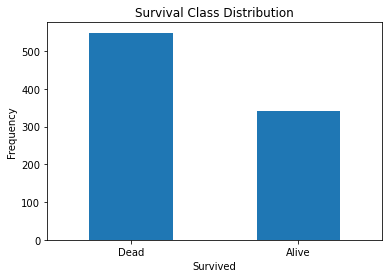

In [44]:
# Plotting the two dataset to get a visual representation
count_classes = pd.value_counts(trainee["Survived"], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Survival Class Distribution")

plt.xticks(range(2), ["Dead", "Alive"])

plt.xlabel("Survived")

plt.ylabel("Frequency")

In [45]:
## Get the survived and the dead dataset 

survived = trainee[trainee["Survived"]==1]

dead = trainee[trainee["Survived"]==0]

In [46]:
print(survived.shape,dead.shape)

(342, 10) (549, 10)


In [47]:
# Implementing Undersampling for Handling Imbalanced 
#upsample the minority class
survived_upsampled = resample(survived,random_state=42,n_samples=len(dead),replace=True)
print("lenth of survived: {} length of dead: {}".format(len(survived_upsampled),len(dead)))


lenth of survived: 549 length of dead: 549


In [48]:
#concatenate the upsampled dataframe
survived__upsampled = pd.concat([survived_upsampled,dead])


In [49]:
survived__upsampled.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
288,289,1,2,male,42.00000,0,0,13.0000,S,Mr
697,698,1,3,female,25.17024,0,0,7.7333,Q,Miss
298,299,1,1,male,25.17024,0,0,30.5000,S,Mr
208,209,1,3,female,16.00000,0,0,7.7500,Q,Miss
483,484,1,3,female,63.00000,0,0,9.5875,S,Mrs


In [50]:
len(survived__upsampled)

1098

In [51]:
survived__upsampled=shuffle(survived__upsampled)

In [52]:
survived__upsampled.shape

(1098, 10)

In [53]:
survived__upsampled

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
413,414,0,2,male,25.17024,0,0,0.0000,S,Mr
553,554,1,3,male,22.00000,0,0,7.2250,C,Mr
817,818,0,2,male,31.00000,1,1,37.0042,C,Mr
304,305,0,3,male,25.17024,0,0,8.0500,S,Mr
544,545,0,1,male,50.00000,1,0,106.4250,C,Mr
...,...,...,...,...,...,...,...,...,...,...
319,320,1,1,female,40.00000,1,1,134.5000,C,Mrs
270,271,0,1,male,25.17024,0,0,31.0000,S,Mr
697,698,1,3,female,25.17024,0,0,7.7333,Q,Miss
576,577,1,2,female,34.00000,0,0,13.0000,S,Miss


### Converting Categorical attributes into numerical

In [54]:
cat_cols=["Sex","Title","Embarked"]
for col in cat_cols:
    le= preprocessing.LabelEncoder()
    le.fit(survived__upsampled[col].unique())
    survived__upsampled[col+"_enc"]= le.transform(survived__upsampled[col])
    filename = col+".pkl"
    pickle.dump(le, open(filename, 'wb'))
    
    


survived__upsampled.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Sex_enc,Title_enc,Embarked_enc
413,414,0,2,male,25.17024,0,0,0.0000,S,Mr,1,10,2
553,554,1,3,male,22.00000,0,0,7.2250,C,Mr,1,10,0
817,818,0,2,male,31.00000,1,1,37.0042,C,Mr,1,10,0
304,305,0,3,male,25.17024,0,0,8.0500,S,Mr,1,10,2
544,545,0,1,male,50.00000,1,0,106.4250,C,Mr,1,10,0


In [55]:
df = survived__upsampled.copy()

In [56]:
# drop converted classes
df.drop(["Sex", "Embarked","Title"], axis=1, inplace=True)

In [57]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_enc,Title_enc,Embarked_enc
413,414,0,2,25.17024,0,0,0.0000,1,10,2
553,554,1,3,22.00000,0,0,7.2250,1,10,0
817,818,0,2,31.00000,1,1,37.0042,1,10,0
304,305,0,3,25.17024,0,0,8.0500,1,10,2
544,545,0,1,50.00000,1,0,106.4250,1,10,0
...,...,...,...,...,...,...,...,...,...,...
319,320,1,1,40.00000,1,1,134.5000,0,11,0
270,271,0,1,25.17024,0,0,31.0000,1,10,2
697,698,1,3,25.17024,0,0,7.7333,0,7,1
576,577,1,2,34.00000,0,0,13.0000,0,7,2


### Train test split

In [58]:
X = df.drop("Survived", axis=1)
X = X.values
y = df["Survived"]

In [59]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

print(X_trainset.shape, X_testset.shape, y_trainset.shape, y_testset.shape)

(768, 9) (330, 9) (768,) (330,)


## Training different models

### Machine learning

logistic regression, xgboost, decision tree, random forest, svm, lgbm

confusion matrix, precision, recall, sensitivity, specificity, f1-score, RoC curve, AuC

### Logistic Regression

Logistic Regression used to estimate the relationship between a dependent variable and one or more independent variables, but it is used to make a prediction about a categorical variable versus a continuous one. A categorical variable can be true or false, yes or no, 1 or 0, et cetera. The unit of measure also differs from linear regression as it produces a probability, but the logit function transforms the S-curve into straight line.

##### Used Cases
1. Predicting the probability of a person having a heart attack
2. Predicting the mortality in injured patients
3. Predicting a customers propensity to purchase a product or halt a subscription
4. Predicting the probability of failure of a given proces or product
5. Predicting the likelihood of a homeowner defaulting on a mortgage

##### When to use
1. If data is binary: 0/1, YES/NO, TRUE/FALSE
2. If you need probabilistic results
3. When you need a linear decision boundary
4. If you need to understand the impact of a feature

In [60]:
log = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
log.fit(X_trainset, y_trainset)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [61]:
print("Model Intercept: {} , Model coefficient: {}".format(log.intercept_, log.coef_))

Model Intercept: [5.78366375] , Model coefficient: [[ 4.13008761e-04 -8.31949390e-01 -2.59051547e-02 -2.74057318e-01
  -2.85819481e-01  2.93359576e-03 -2.81035648e+00 -1.10646329e-01
  -2.53295044e-01]]


In [62]:
log_ypred = log.predict(X_testset)

In [63]:
# print(log_ypred)

In [64]:
confusion_matrix(y_testset, log_ypred)

array([[130,  41],
       [ 46, 113]], dtype=int64)

In [65]:
classification_report(y_testset, log_ypred, output_dict=True)

{'0': {'precision': 0.7386363636363636,
  'recall': 0.7602339181286549,
  'f1-score': 0.7492795389048991,
  'support': 171},
 '1': {'precision': 0.7337662337662337,
  'recall': 0.710691823899371,
  'f1-score': 0.7220447284345047,
  'support': 159},
 'accuracy': 0.7363636363636363,
 'macro avg': {'precision': 0.7362012987012987,
  'recall': 0.735462871014013,
  'f1-score': 0.7356621336697019,
  'support': 330},
 'weighted avg': {'precision': 0.7362898465171193,
  'recall': 0.7363636363636363,
  'f1-score': 0.7361573120418908,
  'support': 330}}

In [66]:

precision,recall,fscore,support=score(y_testset, log_ypred,average='macro')

dict_l = {"Model": "Logistic Regression", "Precision": precision, "Recall":recall, "F-Score":fscore, "Support":support}
print(dict_l)

{'Model': 'Logistic Regression', 'Precision': 0.7362012987012987, 'Recall': 0.735462871014013, 'F-Score': 0.7356621336697019, 'Support': None}


In [67]:
'''log_probs = log.predict_proba(X_testset)
log_probs = log_probs[:, 1]
# print(len(log_probs))
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)'''

'log_probs = log.predict_proba(X_testset)\nlog_probs = log_probs[:, 1]\n# print(len(log_probs))\nns_auc = roc_auc_score(testy, ns_probs)\nlr_auc = roc_auc_score(testy, lr_probs)'

In [68]:
""""
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()"""

'"\nlr_probs = model.predict_proba(testX)\n# keep probabilities for the positive outcome only\nlr_probs = lr_probs[:, 1]\n# calculate scores\nns_auc = roc_auc_score(testy, ns_probs)\nlr_auc = roc_auc_score(testy, lr_probs)\n# summarize scores\nprint(\'No Skill: ROC AUC=%.3f\' % (ns_auc))\nprint(\'Logistic: ROC AUC=%.3f\' % (lr_auc))\n# calculate roc curves\nns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)\nlr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)\n# plot the roc curve for the model\npyplot.plot(ns_fpr, ns_tpr, linestyle=\'--\', label=\'No Skill\')\npyplot.plot(lr_fpr, lr_tpr, marker=\'.\', label=\'Logistic\')\n# axis labels\npyplot.xlabel(\'False Positive Rate\')\npyplot.ylabel(\'True Positive Rate\')\n# show the legend\npyplot.legend()\n# show the plot\npyplot.show()'

In [69]:
# from sklearn import metrics

In [70]:
# metrics.plot_roc_curve(log, X_testset, y_testset)
# plt.show()

### Decision Tree

Decision Tree is a type of Supervised Machine Learning where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves.The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split. 

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [73]:
tree.fit(X_trainset, y_trainset)

# prediction
tree_ypred = tree.predict(X_testset)

In [74]:
confusion_matrix(y_testset, tree_ypred)

array([[125,  46],
       [ 29, 130]], dtype=int64)

In [75]:
classification_report(y_testset, tree_ypred, output_dict=True)

{'0': {'precision': 0.8116883116883117,
  'recall': 0.7309941520467836,
  'f1-score': 0.7692307692307693,
  'support': 171},
 '1': {'precision': 0.7386363636363636,
  'recall': 0.8176100628930818,
  'f1-score': 0.7761194029850748,
  'support': 159},
 'accuracy': 0.7727272727272727,
 'macro avg': {'precision': 0.7751623376623377,
  'recall': 0.7743021074699328,
  'f1-score': 0.772675086107922,
  'support': 330},
 'weighted avg': {'precision': 0.7764905548996458,
  'recall': 0.7727272727272727,
  'f1-score': 0.77254983822148,
  'support': 330}}

In [76]:

precision,recall,fscore,support=score(y_testset, tree_ypred,average='macro')

dict_t = {"Model": "Decision Tree", "Precision": precision, "Recall":recall, "F-Score":fscore, "Support":support}
print(dict_t)

{'Model': 'Decision Tree', 'Precision': 0.7751623376623377, 'Recall': 0.7743021074699328, 'F-Score': 0.772675086107922, 'Support': None}


### Random Forest



In [77]:
# Instantiate model with 1000 decision trees
forest = RandomForestClassifier(oob_score=False, random_state = 42)


In [78]:
forest.fit(X_trainset, y_trainset)

RandomForestClassifier(random_state=42)

In [79]:
# prediction
forest_ypred = forest.predict(X_testset)
# forest.predict_proba(X_testset)

In [80]:
# when using random forest regressor
forest_ypred = forest_ypred.round(1)

In [81]:
pred_df = pd.DataFrame({"actual":y_testset, "predicted":forest_ypred})
print(pred_df)

     actual  predicted
165       1          1
362       0          1
530       1          1
756       0          0
358       1          1
..      ...        ...
24        0          0
365       0          0
446       1          1
796       1          1
579       1          1

[330 rows x 2 columns]


In [82]:
pred_agg=pred_df.groupby(["actual","predicted"])["predicted"].aggregate(["count"]).reset_index()
print(pred_agg)
# actual_agg=pred_df.groupby("actual").aggregate(["count"])
# print(actual_agg)
# aggr = pd.merge(pred_agg,actual_agg, on=actual_agg,suffixes=["_predicted","_actual"])

   actual  predicted  count
0       0          0    143
1       0          1     28
2       1          0     14
3       1          1    145


<AxesSubplot:xlabel='predicted', ylabel='count'>

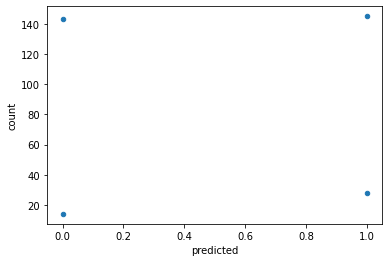

In [83]:
pred_agg.plot.scatter(x="predicted", y="count")
# to this line. use the plot to find the forset threshold, in this case 0.6

In [84]:
ypred = np.where(forest_ypred > 0.6, 1, 0)
print(ypred)

[1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0
 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1
 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1
 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1]


In [85]:
confusion_matrix(y_testset, ypred)

array([[143,  28],
       [ 14, 145]], dtype=int64)

In [86]:
classification_report(y_testset, ypred, output_dict=True)

{'0': {'precision': 0.910828025477707,
  'recall': 0.8362573099415205,
  'f1-score': 0.8719512195121951,
  'support': 171},
 '1': {'precision': 0.838150289017341,
  'recall': 0.9119496855345912,
  'f1-score': 0.8734939759036146,
  'support': 159},
 'accuracy': 0.8727272727272727,
 'macro avg': {'precision': 0.874489157247524,
  'recall': 0.8741034977380558,
  'f1-score': 0.8727225977079048,
  'support': 330},
 'weighted avg': {'precision': 0.8758105706377125,
  'recall': 0.8727272727272727,
  'f1-score': 0.8726945475916971,
  'support': 330}}

In [87]:

precision,recall,fscore,support=score(y_testset, ypred,average='macro')

dict_f = {"Model": "Random Forest", "Precision": precision, "Recall":recall, "F-Score":fscore, "Support":support}
print(dict_f)

{'Model': 'Random Forest', 'Precision': 0.874489157247524, 'Recall': 0.8741034977380558, 'F-Score': 0.8727225977079048, 'Support': None}


In [88]:
comp_df = pd.DataFrame([dict_f,dict_t, dict_l] , index=[1, 2, 3])
print(comp_df)

                 Model  Precision    Recall   F-Score Support
1        Random Forest   0.874489  0.874103  0.872723    None
2        Decision Tree   0.775162  0.774302  0.772675    None
3  Logistic Regression   0.736201  0.735463  0.735662    None


### Support Vector Machine

In [89]:
clf = svm.SVC(kernel='rbf')


In [90]:
clf.fit(X_trainset, y_trainset)

SVC()

In [91]:
svm_ypred = clf.predict(X_testset)

In [92]:
precision,recall,fscore,support=score(y_testset, svm_ypred,average='macro')

dict_s = {"Model": "Support Vector Machine", "Precision": precision, "Recall":recall, "F-Score":fscore, "Support":support}
print(dict_s)

{'Model': 'Support Vector Machine', 'Precision': 0.7228571428571429, 'Recall': 0.6147522895288535, 'F-Score': 0.569377990430622, 'Support': None}


### Lgbm

In [93]:
lgbm = lgb.LGBMClassifier()

In [94]:
lgbm.fit(X_trainset, y_trainset)

LGBMClassifier()

In [95]:
lgbm_ypred = lgbm.predict(X_testset)
# lgbm_ypred

In [96]:
precision,recall,fscore,support=score(y_testset, lgbm_ypred,average='macro')

dict_lg = {"Model": "Light Gradient Boost", "Precision": precision, "Recall":recall, "F-Score":fscore, "Support":support}
print(dict_lg)

{'Model': 'Light Gradient Boost', 'Precision': 0.8822751322751323, 'Recall': 0.8826547500827541, 'F-Score': 0.8818084139185056, 'Support': None}


### Xgboost

In [97]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [98]:
xgb.fit(X_trainset, y_trainset)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [99]:
xgb_ypred = xgb.predict(X_testset)
# xgb_ypred

In [100]:
precision,recall,fscore,support=score(y_testset, xgb_ypred,average='macro')

dict_xgb = {"Model": "XGBoost", "Precision": precision, "Recall":recall, "F-Score":fscore, "Support":support}
print(dict_xgb)

{'Model': 'XGBoost', 'Precision': 0.8580246913580247, 'Recall': 0.8583802272978043, 'F-Score': 0.8575639860043529, 'Support': None}


In [101]:
# intentionally adding this error code
# delete if code has been finalized
#####  #####   #####    ###  #####      ##   ## #####  ###   ###     #     ###  ##### 
#      #    #  #    #  #   # #    #     # # # # #     #     #       # #   #     #     
####   #####   #####   #   # #####      #  #  # ####   ###   ###   #####  # ### ####  
#      #    #  #    #  #   # #    #     #     # #         #     #  #    # #   # #     
#####  #     # #     #  ###  #     #    #     # ##### ###   ###    #    #  ###  ##### 



# for i in range(train["Name"]):
#     print(train["Name"](i))

In [102]:
class evaluation:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
    # performing a full prediction and evaluation 
    def feval(self):
        log = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
        log.fit(self.X_train, self.y_train)
        log_ypred = log.predict(self.X_test)
        precision,recall,fscore,support=score(self.y_test, log_ypred,average='macro')
        dict_l = {"Model": "Logistic Regression", "Precision": precision, "Recall":recall, "F-Score":fscore, "Support":support}
        
        tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
        tree.fit(self.X_train, self.y_train)
        tree_ypred = tree.predict(self.X_test)
        precision,recall,fscore,support=score(self.y_test, tree_ypred,average='macro')
        dict_t = {"Model": "Decision Tree", "Precision": precision, "Recall":recall, "F-Score":fscore, "Support":support}
        
        forest = RandomForestClassifier(random_state = 42)
        forest.fit(self.X_train, self.y_train)
        forest_ypred = forest.predict(self.X_test)
        precision,recall,fscore,support=score(self.y_test, forest_ypred,average='macro')
        dict_f = {"Model": "Random Forest", "Precision": precision, "Recall":recall, "F-Score":fscore, "Support":support}
        
        clf = svm.SVC(kernel='rbf')
        clf.fit(self.X_train, self.y_train)
        svm_ypred = clf.predict(self.X_test)
        precision,recall,fscore,support=score(self.y_test, svm_ypred,average='macro')
        dict_s = {"Model": "Support Vector Machine", "Precision": precision, "Recall":recall, "F-Score":fscore, "Support":support}
        
        lgbm = lgb.LGBMClassifier()
        lgbm.fit(self.X_train, self.y_train)
        lgbm_ypred = lgbm.predict(self.X_test)
        precision,recall,fscore,support=score(self.y_test, lgbm_ypred,average='macro')
        dict_lg = {"Model": "Light Gradient Boost", "Precision": precision, "Recall":recall, "F-Score":fscore, "Support":support}

        xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
        xgb.fit(X_trainset, y_trainset)
        xgb_ypred = xgb.predict(X_testset)
        precision,recall,fscore,support=score(y_testset, xgb_ypred,average='macro')
        dict_xgb = {"Model": "XGBoost", "Precision": precision, "Recall":recall, "F-Score":fscore, "Support":support}

        
        comp_df = pd.DataFrame([dict_l, dict_t, dict_f, dict_s, dict_lg, dict_xgb] , index=[1, 2, 3, 4, 5, 6])
        print(comp_df)
        
        pred_values = {"Logistic Regression confusion matrix":log_ypred, "Decision Tree confusion matrix":tree_ypred, 
                       "Random Forest confusion matrix": forest_ypred, "Support Vector Machine confusion matrix":svm_ypred, 
                       "Light Gradient Boost confusion matrix":lgbm_ypred, "XGBoost confusion matrix":xgb_ypred}
        for i,v in pred_values.items():
            print()
            print(i)
            matrix = confusion_matrix(y_testset, v)
            print(matrix)
        

In [103]:
class evaluation:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
    # performing a full prediction and evaluation 
    def feval(self):
        models_used = pd.DataFrame()
        comp_df = pd.DataFrame()
        models = {"Logistic Regression_ypred":LogisticRegression(solver='liblinear', C=10.0, random_state=0),
                 "Decision Tree_ypred": DecisionTreeClassifier(criterion="entropy", max_depth = 4),
                 "Random Forest_ypred":RandomForestClassifier(random_state = 42),
                 "Support Vector Machines_ypred":svm.SVC(kernel='rbf', probability=True),
                 "Light Gradient Boost_ypred":lgb.LGBMClassifier(),
                 "XGBoost_ypred":XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')}
        
        for i,model in models.items():
            model_name = i.split("_")[0]
            
            # fit the model
            model.fit(self.X_train, self.y_train)
            
            # predicting using test and test set
            pred_test = model.predict(self.X_test)
            pred_train = model.predict(self.X_train)
            
            # predicting probabilites that will be used for calculating the auc and roc curve
            prob_test = model.predict_proba(self.X_test)
            prob_train = model.predict_proba(self.X_train)
            
            # keep probabilities for the positive outcome only
            prob_test = prob_test[:, 1]
            prob_train = prob_train[:, 1]

            # calculate scores
            model_auc_test = roc_auc_score(self.y_test, prob_test)
            model_auc_train = roc_auc_score(self.y_train, prob_train)
            # summarize scores

            # print('Logistic: ROC AUC=%.3f' % (lr_auc))
            # calculate roc curves

            model_fpr, model_tpr, _ = roc_curve(self.y_test, prob_test)
            # plot the roc curve for the model
            
            # creating the confusion matrix
            matrix_test = confusion_matrix(self.y_test, pred_test)
            matrix_train = confusion_matrix(self.y_train, pred_train)
            
            # calculating various evaluation metrics
            precision_test,recall_test,fscore_test,support_test=score(self.y_test, pred_test,average='macro')
            precision_train,recall_train,fscore_train,support_train=score(self.y_train, pred_train,average='macro')
            
            i = {"Model":model_name, "Model_name": model_name,"model_": model, 
                 "Precision_test": precision_test, "Precision_train": precision_train, 
                 "Recall_test":recall_test, "Recall_train":recall_train, 
                 "F-Score_test":fscore_test, "F-Score_train":fscore_train, 
                 "AUC_test":model_auc_test, "AUC_train":model_auc_train}
            msaved = {"model_name":model_name,"model": model}
            
            # printing confusion matrix
            models_used = models_used.append(msaved, ignore_index=True)
            comp_df = comp_df.append(i, ignore_index=True)
            print()
            print(model_name+ " test set confusion matrix")
            print(matrix_test)
            print(model_name+ " train set confusion matrix")
            print(matrix_train)
            
            # creating the plots
            pyplot.plot(model_fpr, model_tpr, marker='.', label=model_name)
            pyplot.xlabel('False Positive Rate')
            pyplot.ylabel('True Positive Rate')
            # show the legend
            pyplot.legend()

            
        # printing models used, and train and test dataset
        print()
        print("Models used in prediction:\n {}" .format(models_used))
        print()
        print(comp_df[["Model", "Precision_test", "Precision_train", "Recall_test", "Recall_train", 
                                "F-Score_test", "F-Score_train", "AUC_test", "AUC_train"]])
        # show the plot
        pyplot.show()
        return comp_df,models_used
        
        
    def choice(self, df, auc_thresh, crit, filename):#, crit, auc_thresh
        """
        fidn the modl with the highes value of criteria
        use it to find the model
        save the model with the right name
        
        check and make sure the acu test and train is not greater than 0.3
        2.selected metrics should not have a difference greater than 0.3
        1.pick all models whose auc test is above the threshold
        
        
        check if the selected model has a criteria difference greater than 0.3
        """
        nex = crit.replace("test", "train")
      
        
        useful = df[df["AUC_test"] > auc_thresh]
        
        try:
        
            assert len(useful) > 0, "All models are not reliable "
            usefuler = useful.loc[abs(useful[ "AUC_test"]-useful["AUC_train"])<=0.3]
            assert len(usefuler) > 0, "AUCs  overfitting "
            usefulerr = usefuler.loc[abs(useful[crit]-useful[nex])<=0.3]
            assert len(usefulerr) > 0, "Model criteria shows overfitting"
            modelusedd=usefulerr[usefulerr[crit] == usefulerr[crit].max()]["model_"]
            print(usefulerr)
            print(modelusedd)
            pickle.dump(modelusedd.values[0], open(filename, 'wb'))
        except AssertionError as e:
            print( e.args[0])
    
        
        

#         print(crit)
#         print(modelusedd)
#         print(crit)
#         print(auc_thresh)

#         pickle.dump(model, open(filename, 'wb'))
        
        
#         crit = input("Model selection criteria (precision, recall, f-score: \n")
#         data = ["Model", "Precision_test", "Precision_train", "Recall_test", "Recall_train", 
#                                 "F-Score_test", "F-Score_train", "Support_test", "Support_train"]
        
#         if crit == "precision":
#             comp_df= comp_df[comp_df["Precision_test"] == comp_df["Precision_test"].max()]
#             print(comp_df[data])
#         elif crit == "recall":
#             comp_df= comp_df[comp_df["Recall_test"] == comp_df["Recall_test"].max()]
#             print(comp_df[data])
#         elif crit == "f-score":
#             comp_df= comp_df[comp_df["Recall_test"] == comp_df["Recall_test"].max()]
#             print(comp_df[data])
#         else:
#             print("Invalid criteria")
        

In [104]:
clseval= evaluation(X_trainset, y_trainset, X_testset, y_testset)


Logistic Regression test set confusion matrix
[[130  41]
 [ 46 113]]
Logistic Regression train set confusion matrix
[[313  65]
 [ 96 294]]

Decision Tree test set confusion matrix
[[125  46]
 [ 29 130]]
Decision Tree train set confusion matrix
[[298  80]
 [ 50 340]]

Random Forest test set confusion matrix
[[143  28]
 [ 14 145]]
Random Forest train set confusion matrix
[[378   0]
 [  0 390]]

Support Vector Machines test set confusion matrix
[[164   7]
 [116  43]]
Support Vector Machines train set confusion matrix
[[352  26]
 [268 122]]

Light Gradient Boost test set confusion matrix
[[147  24]
 [ 15 144]]
Light Gradient Boost train set confusion matrix
[[378   0]
 [  0 390]]

XGBoost test set confusion matrix
[[143  28]
 [ 19 140]]
XGBoost train set confusion matrix
[[378   0]
 [  0 390]]

Models used in prediction:
                                                model               model_name
0  LogisticRegression(C=10.0, random_state=0, sol...      Logistic Regression
1  DecisionTr

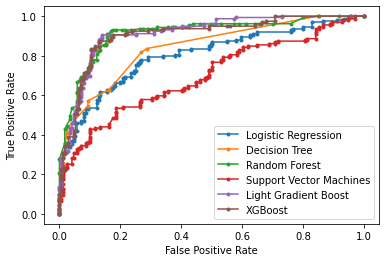

In [105]:
done,models_used = clseval.feval()

In [106]:
clseval.choice(done, 0.9, "Precision_test", "usedmodel.pkl")

   AUC_test  AUC_train  F-Score_test  F-Score_train                 Model  \
2  0.913623        1.0      0.872723            1.0         Random Forest   
4  0.912814        1.0      0.881808            1.0  Light Gradient Boost   
5  0.904833        1.0      0.857564            1.0               XGBoost   

             Model_name  Precision_test  Precision_train  Recall_test  \
2         Random Forest        0.874489              1.0     0.874103   
4  Light Gradient Boost        0.882275              1.0     0.882655   
5               XGBoost        0.858025              1.0     0.858380   

   Recall_train                                             model_  
2           1.0  (DecisionTreeClassifier(max_features='sqrt', r...  
4           1.0                                   LGBMClassifier()  
5           1.0  XGBClassifier(base_score=0.5, booster='gbtree'...  
4    LGBMClassifier()
Name: model_, dtype: object


In [107]:
models_used.model[2].predict_proba(X_testset)

array([[0.39, 0.61],
       [0.44, 0.56],
       [0.03, 0.97],
       [0.78, 0.22],
       [0.01, 0.99],
       [0.16, 0.84],
       [0.77, 0.23],
       [0.  , 1.  ],
       [0.86, 0.14],
       [0.91, 0.09],
       [0.18, 0.82],
       [0.95, 0.05],
       [0.67, 0.33],
       [0.02, 0.98],
       [0.13, 0.87],
       [0.44, 0.56],
       [0.52, 0.48],
       [0.74, 0.26],
       [0.08, 0.92],
       [0.75, 0.25],
       [0.05, 0.95],
       [0.63, 0.37],
       [0.59, 0.41],
       [0.19, 0.81],
       [0.9 , 0.1 ],
       [0.96, 0.04],
       [0.26, 0.74],
       [0.95, 0.05],
       [0.14, 0.86],
       [0.23, 0.77],
       [0.96, 0.04],
       [0.87, 0.13],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.98, 0.02],
       [0.31, 0.69],
       [0.01, 0.99],
       [0.98, 0.02],
       [0.43, 0.57],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.77, 0.23],
       [0.6 , 0.4 ],
       [0.97, 0.03],
       [0.05, 0.95],
       [0.27, 0.73],
       [0.9 , 0.1 ],
       [0.  ,

In [108]:
# pprrint(saa)

# Testing using the test data


### Import the data

In [109]:
test = bg.DataLoading(r"C:\Users\Blaq_Jesus\Desktop\Python Projects\Endtoendproject1", "test.csv").csv()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [110]:
tbinwidth = int((max(test["Age"])-min(test["Age"]))/11)
tbins = range(int(min(test["Age"])), int(max(test["Age"])), tbinwidth)
tgroup_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
test["Age_binned"] = pd.cut(test["Age"], tbins, labels=tgroup_names)

In [111]:
fourth = test[test["Age_binned"]=="4"]
# print(fourth["Sex"].value_counts("male"))
sixth = test[test["Age_binned"]=="6"]
# print(sixth["Sex"].value_counts("male"))
fifth = test[test["Age_binned"]=="5"]
# print(fifth["Sex"].value_counts("male"))
third = test[test["Age_binned"]=="3"]
# print(third["Sex"].value_counts("male"))
seventh = test[test["Age_binned"]=="7"]
# print(seventh["Sex"].value_counts("male"))

In [112]:
age_df = [fourth, fifth, third]
age_df = pd.concat(age_df)
# age_df

In [113]:
mean = round(age_df["Age"].mean(), 5)
print(mean)
test["Age"] = test["Age"].fillna(mean)

23.24286


In [114]:
test[test["Age_binned"].isnull().values]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_binned
10,902,3,"Ilieff, Mr. Ylio",male,23.24286,0,0,349220,7.8958,NaN,S,NaN
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,23.24286,0,0,PC 17598,31.6833,NaN,S,NaN
29,921,3,"Samaan, Mr. Elias",male,23.24286,2,0,2662,21.6792,NaN,C,NaN
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,23.24286,1,2,W./C. 6607,23.4500,NaN,S,NaN
36,928,3,"Roth, Miss. Sarah A",female,23.24286,0,0,342712,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,23.24286,0,0,334915,7.7208,NaN,Q,NaN
410,1302,3,"Naughton, Miss. Hannah",female,23.24286,0,0,365237,7.7500,NaN,Q,NaN
413,1305,3,"Spector, Mr. Woolf",male,23.24286,0,0,A.5. 3236,8.0500,NaN,S,NaN
416,1308,3,"Ware, Mr. Frederick",male,23.24286,0,0,359309,8.0500,NaN,S,NaN


In [115]:
for i in range(0, 891):
    test[['Last','First']]=test.Name.str.split(",", expand=True)
    
    
# df[['First','Last']] = df.Name.str.split(" ",expand=True,)


In [116]:
for i in range(0, 891):
    test[['Title','Firstname']]=test.First.str.split(".", expand=True)

In [117]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_binned,Last,First,Title,Firstname
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,6,Kelly,Mr. James,Mr,James
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,8,Wilkes,Mrs. James (Ellen Needs),Mrs,James (Ellen Needs)
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,11,Myles,Mr. Thomas Francis,Mr,Thomas Francis
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,5,Wirz,Mr. Albert,Mr,Albert
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,4,Hirvonen,Mrs. Alexander (Helga E Lindqvist),Mrs,Alexander (Helga E Lindqvist)


In [118]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  Age_binned   331 non-null    category
 12  Last         418 non-null    object  
 13  First        418 non-null    object  
 14  Title        418 non-null    object  
 15  Firstname    418 non-null    object  
dtypes: category(1), float64(2), int64(4), object(9)
memory usage: 49.9+ KB


In [119]:
test.drop(["Last","Name", "Cabin", "First", "Firstname", "Ticket","Age_binned"], axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   Title        418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [120]:
mean = round(age_df["Fare"].mean(), 5)
print(mean)
test["Fare"] = test["Fare"].fillna(mean)

27.75117


In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Title        418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [122]:
print(test[test["Title"]==' Dona'])
test = test[test.Title != ' Dona']
print(test[test["Title"]==' Dona'])

     PassengerId  Pclass     Sex   Age  SibSp  Parch   Fare Embarked  Title
414         1306       1  female  39.0      0      0  108.9        C   Dona
Empty DataFrame
Columns: [PassengerId, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Title]
Index: []


In [123]:
cat_colmns = ["Sex", "Embarked", "Title"]
for col in cat_colmns:
    file = col+".pkl"
#     print(file)
    pickled_concatmodel = pickle.load(open(file, 'rb'))
    test[col+"_enc"]= pickled_concatmodel.transform(test[col])
    
    


test.head(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Sex_enc,Embarked_enc,Title_enc
0,892,3,male,34.50000,0,0,7.8292,Q,Mr,1,1,10
1,893,3,female,47.00000,1,0,7.0000,S,Mrs,0,2,11
2,894,2,male,62.00000,0,0,9.6875,Q,Mr,1,1,10
3,895,3,male,27.00000,0,0,8.6625,S,Mr,1,2,10
4,896,3,female,22.00000,1,1,12.2875,S,Mrs,0,2,11
5,897,3,male,14.00000,0,0,9.2250,S,Mr,1,2,10
6,898,3,female,30.00000,0,0,7.6292,Q,Miss,0,1,7
7,899,2,male,26.00000,1,1,29.0000,S,Mr,1,2,10
8,900,3,female,18.00000,0,0,7.2292,C,Mrs,0,0,11
9,901,3,male,21.00000,2,0,24.1500,S,Mr,1,2,10


In [124]:
df = test.copy()
df.drop(["Sex", "Embarked","Title"], axis=1, inplace=True)
df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_enc,Embarked_enc,Title_enc
0,892,3,34.50000,0,0,7.8292,1,1,10
1,893,3,47.00000,1,0,7.0000,0,2,11
2,894,2,62.00000,0,0,9.6875,1,1,10
3,895,3,27.00000,0,0,8.6625,1,2,10
4,896,3,22.00000,1,1,12.2875,0,2,11
...,...,...,...,...,...,...,...,...,...
412,1304,3,28.00000,0,0,7.7750,0,2,7
413,1305,3,23.24286,0,0,8.0500,1,2,10
415,1307,3,38.50000,0,0,7.2500,1,2,10
416,1308,3,23.24286,0,0,8.0500,1,2,10


In [125]:
pickled_model = pickle.load(open('usedmodel.pkl', 'rb'))

pickled_model

LGBMClassifier()

In [126]:
Ypredict = pickled_model.predict(df.values)  

Ypredict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [127]:
test_done = pd.concat([test, pd.DataFrame(Ypredict, columns=["Survived"])], axis=1)
test_done["Survived"] = test_done["Survived"].map({0.0: "Died", 1.0:"Survived"})
test_done.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Sex_enc,Embarked_enc,Title_enc,Survived
0,892.0,3.0,male,34.5,0.0,0.0,7.8292,Q,Mr,1.0,1.0,10.0,Died
1,893.0,3.0,female,47.0,1.0,0.0,7.0000,S,Mrs,0.0,2.0,11.0,Died
2,894.0,2.0,male,62.0,0.0,0.0,9.6875,Q,Mr,1.0,1.0,10.0,Died
3,895.0,3.0,male,27.0,0.0,0.0,8.6625,S,Mr,1.0,2.0,10.0,Died
4,896.0,3.0,female,22.0,1.0,1.0,12.2875,S,Mrs,0.0,2.0,11.0,Died
5,897.0,3.0,male,14.0,0.0,0.0,9.2250,S,Mr,1.0,2.0,10.0,Died
6,898.0,3.0,female,30.0,0.0,0.0,7.6292,Q,Miss,0.0,1.0,7.0,Died
7,899.0,2.0,male,26.0,1.0,1.0,29.0000,S,Mr,1.0,2.0,10.0,Died
8,900.0,3.0,female,18.0,0.0,0.0,7.2292,C,Mrs,0.0,0.0,11.0,Survived
9,901.0,3.0,male,21.0,2.0,0.0,24.1500,S,Mr,1.0,2.0,10.0,Died


In [128]:
# intentionally adding this error code
# delete if code has been finalized
#####  #####   #####    ###  #####      ##   ## #####  ###   ###     #     ###  ##### 
#      #    #  #    #  #   # #    #     # # # # #     #     #       # #   #     #     
####   #####   #####   #   # #####      #  #  # ####   ###   ###   #####  # ### ####  
#      #    #  #    #  #   # #    #     #     # #         #     #  #    # #   # #     
#####  #     # #     #  ###  #     #    #     # ##### ###   ###    #    #  ###  ##### 



for i in range(train["Name"]):
    print(train["Name"](i))

KeyError: 'Name'